# PONTIFÍCIA UNIVERSIDADE CATÓLICA
Gabriel Crespi de Santana, RA: 00274413

Kevin Egídio de Toledo, RA: 00282590

Pedro Lucas Silva Ferreira, RA: 00285608

# Projeto Integrado | Ciência de Dados e Inteligência Artificial

## 1. Objetivo de Negócio
Segundo o site da <a href=https://fia.com.br/blog/profissoes-do-futuro/>Fundação Instituto de Administração</a>, o cargo de Cientista de Dados está em destaque como profissão relevante para o futuro do mercado de trabalho. Há uma grande demanda por esses profissionais, entretanto, em termos relativos, há pouca mão de obra devidamente capacitada para exercer essa função. Assim, o processo de seleção de novos cientistas de dados e afins precisa ser cauteloso e detalhista, o que demanda tempo e dinheiro por parte da empresa contratante. Considerando isto, o objetivo de negócio deste projeto é utilizar de classificadores de machine learning para identificar os candidatos que realmente querem trabalhar em uma determinada organização (e não estão apenas buscando por outro emprego), minimizando tempo e custo do processo de seleção e treinamento de cientistas de dados.

## 2. Análise exploratória do dataset
O dataset escolhido contém dados sobre candidatos que foram bem sucedidos em cursos promovidos por determinada organização. O intuito é saber (considerando dados demográficos, educacionais e de experiência) quais candidatos realmente querem trabalhar para a empresa e quais estão procurando por outro emprego, bem como quais fatores influenciam nessa escolha.
### Descrição do dataset
- enrollee_id : ID único por candidato

- city: código da cidade

- city_ development _index: índice de desenvolvimento da cidade

- gender: gênero do candidato

- relevent_experience: experiência relevante

- enrolled_university: Tipo de curso universitário matriculado, se houver

- education_level: Nível de escolaridade do candidato

- major_discipline: Disciplina principal de educação do candidato

- experience: Experiência total do candidato em anos

- company_size: Nº de funcionários na empresa do empregador atual

- company_type: Tipo de empregador atual

- lastnewjob: Diferença em anos entre o emprego anterior e o emprego atual

- training_hours: horas de treinamento completadas

- target: 0 – Não está procurando por mudança de emprego, 1 – Está procurando por mudança de emprego

Disponível em: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=sample_submission.csv

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('jobchange.csv', sep=';')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


<AxesSubplot:xlabel='gender', ylabel='count'>

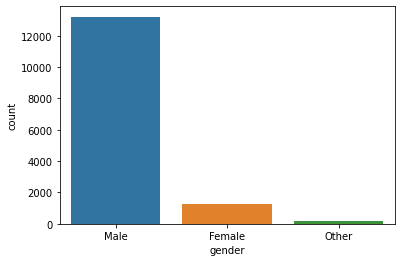

In [3]:
# gênero dos candidatos
sns.countplot(x=df['gender'].dropna())

<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

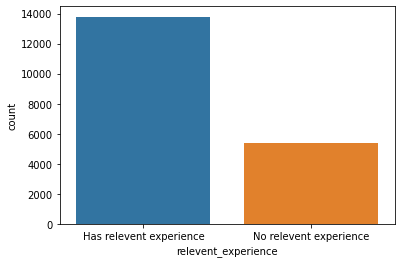

In [4]:
# experiência relevante dos candidatos
sns.countplot(x=df['relevent_experience'])

<AxesSubplot:xlabel='count', ylabel='experience'>

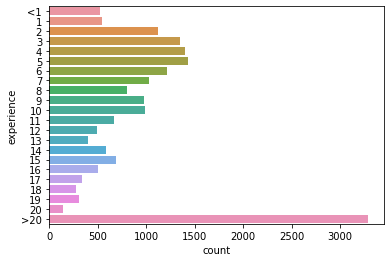

In [5]:
# tempo de experiência dos candidatos
order = ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
 '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20']

sns.countplot(y=df['experience'].sort_values(), order=order)

In [6]:
city = ['enrollee_id', 'city', 'city_development_index']
schooling = ['enrollee_id', 'enrolled_university', 'education_level', 'major_discipline']
experience = ['enrollee_id', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours']


In [7]:
df_city = df.filter(items=city)
# df_city.head()

In [8]:
df_schooling = df.filter(items=schooling)
# df_schooling.head()

In [9]:
educationXdiscipline = df_schooling.groupby(['education_level', 'major_discipline']).count()

In [10]:
# grau de escolaridade x disciplina principal
educationXdiscipline = educationXdiscipline['enrollee_id'].unstack().fillna(0)
educationXdiscipline

major_discipline,Arts,Business Degree,Humanities,No Major,Other,STEM
education_level,,,,,,
Graduate,208.0,238.0,420.0,194.0,272.0,10244.0
Masters,42.0,86.0,225.0,29.0,100.0,3873.0
Phd,3.0,3.0,24.0,0.0,9.0,375.0


<img src="graduacao.png" />

In [11]:
df_experience = df.filter(items=experience)
# df_experience.head()

### Transformando os dados para tipo numérico

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df_encoded = df.copy()

for column in df_encoded.columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])
    
df_encoded.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5018,5,85,1,0,2,0,5,21,8,6,0,35,1
1,16986,77,48,1,1,2,0,5,6,3,5,4,46,0
2,6499,64,14,3,1,0,0,5,15,8,6,5,82,0
3,19067,14,52,3,1,3,0,1,20,8,5,5,51,1
4,358,50,45,1,0,2,2,5,21,3,1,3,7,0


In [14]:
features = ['city', 'city_development_index',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours']

In [15]:
data_encoded = df_encoded[features].values
target_encoded = df_encoded['target']

In [16]:
# print(data)
# print(target)

### Padronizando os dados 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(data_encoded)
target_std = scaler.fit_transform([target_encoded])

## 3. Classificadores

In [18]:
# divisor de dados em treino e teste
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded, target_encoded, test_size=0.3, random_state=18)

### 3.1. Classificador KNN
No caso de querer saber se um candidato específico realmente deseja trabalhar na determinada empresa, baseado em seus atributos, podemos usar o algoritmo KNN para prever o resultado:

In [20]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
# classificador knn
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

pipe = Pipeline([("scaler", scaler), ("knn", knn)])
espaço_busca = [{"knn__n_neighbors": [n for n in range(1,50)]}]
grid = GridSearchCV(pipe, espaço_busca, cv=6, verbose=0).fit(X_train, y_train)
grid

In [ ]:
# número ideal de vizinhos
k_ideal = grid.best_estimator_.get_params()["knn__n_neighbors"]
k_ideal

In [ ]:
# predizendo as observações
classifier = KNeighborsClassifier(n_neighbors=k_ideal, metric="euclidean")
classifier.fit(X_test, y_test)
y_pred = classifier.predict(X_test)
y_pred

#### Métricas de avaliação KNN

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

In [ ]:
print("F1 score:", f1_score(y_test, y_pred, average='micro'))

In [ ]:
print("Precision score:", precision_score(y_test, y_pred, average='micro'))

In [ ]:
print("Accuracy score:", accuracy_score(y_test, y_pred))

In [ ]:
print("Recall score:", recall_score(y_test, y_pred))

In [ ]:
# Score geral do modelo
classifier.score(X_test, y_test)

#### Persistindo o modelo

In [ ]:
import joblib

In [ ]:
with open('modelo_KNN', 'wb') as f: 
    joblib.dump(classifier, f)
with open('modelo_KNN', 'rb') as f:  
    modelo_knn = joblib.load(f)

In [ ]:
modelo_knn.predict(X_test)

### 3.2. Classificador de Regressão Linear
Classificando a satisfação com o trabalho baseado no ano vigente

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
import pandas as pd
df2 = pd.read_csv('processed_data_toDummies.csv')

In [ ]:
df2.rename(columns={'Data scientist or machine learning specialist': 'DS_or_MLS', 
                    'Database administrator':'DBA', 
                    'Data or business analyst': 'DA_or_BA',
                    'Engineer, data': 'SE'}, inplace=True)


In [ ]:
df2.insert(loc=0, column='ID', value=df2.index)
df2.head()

In [ ]:
colunas = ['ID', 'Year','Country','EdLevel','Employment', 'OrgSize']
df2_encoded = df2.copy()

for coluna in df2_encoded.columns[2:]:
    df2_encoded[coluna] = le.fit_transform(df2_encoded[coluna])
df2_encoded.head()

In [ ]:
rl_data = df2_encoded[colunas].values
rl_target = df2_encoded['JobSat'].values

In [ ]:
from sklearn.linear_model import LinearRegression
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(rl_data, rl_target, test_size=0.3, random_state=18)

reg = LinearRegression().fit(X_train_rl, y_train_rl)
reg.score(X_test_rl, y_test_rl)

In [ ]:
rl_pred = reg.predict(X_test_rl)
rl_pred

#### Métricas de avaliação Regressão Linear
Por se tratar de uma regressão, as métricas f1 score, accuracy, precision e recall não são aplicáveis.

In [ ]:
# score do modelo
reg.score(X_test_rl, y_test_rl)

#### Persistindo o modelo

In [ ]:
with open('modelo_RL', 'wb') as f: 
    joblib.dump(reg, f)
with open('modelo_RL', 'rb') as f:  
    modelo_rl = joblib.load(f)

In [ ]:
modelo_rl.predict(X_test_rl)

### 3.3. Classificador de Regressão Logística

In [ ]:
from random import uniform
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
%matplotlib inline

In [ ]:
exam_1 = [] # criando a lista para o exame1
exm_2 = [] # criando a lista para o Exme2

for i in range(0,len(df_encoded)):  # laço de repetição para poder criar todas as notas de uma vez só
    if df_encoded['target'][i] == 1:
        ex_1 = round(uniform(1, 100), 6)
        ex_2 = round(uniform((100-ex_1), 100), 6)
        
        exam_1.append(ex_1)
        exm_2.append(ex_2)
        
    if df_encoded['target'][i] == 0:
        ex_1_0 = round(uniform(1, 100), 6)
        ex_2_0 = round(uniform(1, (100 - ex_1_0)), 6)
        
        exam_1.append(ex_1_0) #adicionando a nota a lista
        exm_2.append(ex_2_0) #adicionando a nota a lista
        
        
df_encoded["exame1"] = exam_1  # criando uma coluna nova
df_encoded["exame2"] = exm_2   # criando uma coluna nova

df_encoded = df_encoded[['city', 'city_development_index',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours','exame1','exame2','target']]  # organizando a ordem das colunas

#### Gráficos dos dados
#### X

In [ ]:
positive = df_encoded[df_encoded['target'].isin([1])]  # pegando todos os valores da lista que tem target == 1
negative = df_encoded[df_encoded['target'].isin([0])]  # pegando todos os valores da lista que tem target == 0

fig, ax = plt.subplots(figsize=(6,6)) 
ax.scatter(positive['exame1'].head(40), positive['exame2'].head(40), s=50, c='b', marker='o', label='Admitido')  # criando os pontos azuis no gráfico
ax.scatter(negative['exame1'].head(40), negative['exame2'].head(40), s=50, c='r', marker='x', label='Não Admitido')  # criando os pontos vermelhos no gráfico
ax.legend('comparação entre admitidos e não admitidos')  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')

In [ ]:
sns.regplot(x='exame2',y='exame1',data=df_encoded.head(40), scatter=True) # criando um gráfico seaborn com os valores dos exames

#### y

In [ ]:
dados = df_encoded['target'].value_counts()  # criando visualização quantitativa dos valores de target
nomes = ['1','2']
fig1, ax1= plt.subplots()

ax1.pie(dados, labels=nomes, autopct='%1.1f%%', shadow=True, startangle = 90)

plt.title('valores de target')
ax1.axis('equal')
plt.show()

In [ ]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(df_encoded[['exame1','exame2']], 
                                                                    df_encoded['target'], test_size=0.3, random_state= 18) # separando teste e treino

In [ ]:
# X (train data) e y (target variavel)
X = X_train_log
y = y_train_log.values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # padronizador

In [ ]:
scaler.fit(X) 
X = scaler.transform(X) # padronizando X

#### Sigmoid

In [ ]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z)) # calculo da sigmoid

In [ ]:
# criando gráfico da sigmois apenas apra visualização

nums = np.arange(-10, 10, step=1) ## distribuição entre -10 e 10 (criada pelo np)

## plotando a sigmoid
fig, ax = plt.subplots(figsize=(6,4))  
ax.plot(nums, sigmoid(nums), 's')


#### Implementação da regressão

In [ ]:
from scipy.stats import spearmanr
# criando visualizaçao da correlação dos dados
ex_1 = df_encoded['exame1']
ex_2 = df_encoded['exame2']

spearman, p = spearmanr(ex_1,ex_2)
print(spearman)

In [ ]:
reg_logistica = LogisticRegression().fit(X,y) # fazendo a regressão logistica com a biblioteca do sklearn
print(round(reg_logistica.score(X,y),4)) 

In [ ]:
scaler.fit(X_test_log)  
X_test_log = scaler.transform(X_test_log) #padronizando o X teste

y_predito = reg_logistica.predict(X_test_log)# fazendo predição


#### métricas de avaliação Regressão Logística

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test_log, y_predito)
print("Confusion Matrix\n",cm)

In [ ]:
# f1 score
print("F1 score:", f1_score(y_test, y_pred, average='micro'))

In [ ]:
# precision
print("Precision score:", precision_score(y_test, y_pred, average='micro'))

In [ ]:
# accuracy 
print("Accuracy score: ", accuracy_score(y_test, y_pred))

In [ ]:
# recall
print("Recall score: ", recall_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report

print("Relatório de classificação: \n", classification_report(y_test_log, y_predito))

#### Persistindo o modelo

In [ ]:
with open('modelo_reg_log', 'wb') as f: 
    joblib.dump(reg_logistica, f)
with open('modelo_reg_log', 'rb') as f:  
    modelo_reg_log = joblib.load(f)

In [ ]:
modelo_reg_log.predict(X_test_log)

### 3.4. Classificador Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

predições = bnb.predict(X_test)
predições

In [ ]:
print('Accuracy score:', accuracy_score(predições, y_test))

In [ ]:
print('F1 score:', f1_score(predições, y_test))

In [ ]:
print('Precison score:', precision_score(predições, y_test))

In [ ]:
print('Recall score:', recall_score(predições, y_test))

In [ ]:
print('Confusion matrix:\n', confusion_matrix(predições, y_test))

In [ ]:
# Score do modelo
bnb.score(X_test, y_test)

#### Persistindo o modelo

In [ ]:
with open('modelo_NB', 'wb') as f:
    joblib.dump(bnb, f)
with open('modelo_NB', 'rb') as f:
    modelo_NB = joblib.load(f)

In [ ]:
modelo_NB.predict(X_test)

### 3.5. Classificador de Árvore de Decisão 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
# atributos influentes na classificação
ad_data_columns = ['experience', 'last_new_job', 'training_hours']

In [ ]:
# definindo atributos e target
X_dt = df_encoded[ad_data_columns].values
y_dt = df['target'].values

# X_dt
# y_dt

In [ ]:
# dividindo treino e teste
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=18)

In [ ]:
# classificador
dtc = DecisionTreeClassifier()

dtc.fit(X_train_dt, y_train_dt)

In [ ]:
# importância dos atributos
dtc.feature_importances_

In [ ]:
# predizendo os dados de teste
predictions_dtc = dtc.predict(X_test_dt)
predictions_dtc

In [ ]:
# TEMPO DE EXPERIÊNCIA | HÁ QUANTO TEMPO FOI O ÚLTIMO EMPREGO | HORAS DE TREINAMENTO
# caso 1: +20 anos, 4 anos, 50 horas
# caso 2: 5 anos, continua trabalhando, 83 horas
# caso 3: 15 anos, 2 anos, 32 horas

casos_dtc = dtc.predict([[21,3,49],
                               [20,5,51],
                               [6,1,31]])
casos_dtc

#### Métricas de avaliação Árvore de Decisão

In [ ]:
print("F1 score:", f1_score(predictions_dtc, y_test_dt))

In [ ]:
print("Precision score:", precision_score(predictions_dtc, y_test_dt))

In [ ]:
print("Accuracy score:", accuracy_score(predictions_dtc, y_test_dt))

In [ ]:
print("Recall score:", recall_score(predictions_dtc, y_test_dt))

In [ ]:
# score geral do modelo
dtc.score(X_test_dt, y_test_dt)

In [ ]:
with open('modelo_DT', 'wb') as f:
    joblib.dump(dtc, f)
with open('modelo_DT', 'rb') as f:
    modelo_dt = joblib.load(f)

In [ ]:
modelo_dt.predict(X_test_dt)

## 4. Banco de Dados
### Dataset 1


In [ ]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import scipy.stats as stats
import pylab as pl

engine = create_engine('sqlite://', echo=False)  #engine para consultar o BD.

In [ ]:
df.head()

#### Modelo conceitual

<img src="modelo_conceitual_ds1.png" />

#### Modelo lógico

<img src="modelo_lógico_ds1.png" />

#### Criando e  Populando as tabelas Dataset 1


In [ ]:
# Especificando as colunas de cada tabela.

person = ['enrollee_id', 'gender','target']
schooling = ['enrollee_id', 'enrolled_university', 'education_level', 'major_discipline']
city = ['enrollee_id', 'city', 'city_development_index']
experience = ['enrollee_id', 'relevent_experience', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours']  

In [ ]:
# Criando as tabelas.

df_person = df.filter(items=person)
df_schooling = df.filter(items=schooling)
df_city = df.filter(items=city)
df_experience = df.filter(items=experience)

In [ ]:
# Convertendo o Dataframe em SQL.

df_person.to_sql('person', con=engine)
df_schooling.to_sql('schooling', con=engine)
df_city.to_sql('city', con=engine)
df_experience.to_sql('experience', con=engine)

### Dataset 2

In [ ]:
df2.head()

#### Modelo conceitual

<img src="modelo_conceitual_ds2.png" />

#### Criando e Populando as Tabelas do Dataset 2


In [ ]:
profession = ['ID', 'Hobbyist','ConvertedComp','DS_or_MLS', 'DBA', 'DA_or_BA', 'SE']
jobsat = ['ID', 'Year','Country','EdLevel','Employment', 'JobSat', 'OrgSize']
individual = ['ID','UndergradMajor', 'YearsCodePro']

In [ ]:
df2_profession = df2.filter(items=profession)
df2_jobsat = df2.filter(items=jobsat)
df2_individual = df2.filter(items=individual)

In [ ]:
df2_profession.to_sql('profession', con=engine)
df2_jobsat.to_sql('jobsat', con=engine)
df2_individual.to_sql('individual', con=engine)

### QUESTÕES


#### QUESTÃO 1 - QUAL A MÉDIA DE ANOS DE EXPERIÊNCIA COM CÓDIGO DE UM CIENTISTA DE DADOS?

In [ ]:
q1 = engine.execute("SELECT avg(i.YearsCodePro) \
                    FROM individual i \
                    JOIN profession p ON i.ID = p.ID\
                    WHERE p.DS_or_MLS == 1").fetchall()

q1

#### QUESTÃO 2 - QUAL A MÉDIA DE SATISFAÇÃO NO TRABALHO AO LONGO DOS ANOS?

In [ ]:
q2 = engine.execute("SELECT Year, avg(JobSat) FROM jobsat GROUP BY Year")
pd.DataFrame(q2)   #tranformando a query em Dataframe

#### QUESTÃO 3 - QUANTOS PROFISSIONAIS SÃO ESPECIFICAMENTE CIENTISTAS DE DADOS? (dataset 2)

In [ ]:
q3 = engine.execute("SELECT count(DS_or_MLS) FROM profession WHERE DS_or_MLS = 1 ").fetchall()
q3

#### QUESTÃO 4 - QUAL A RELAÇÃO ENTRE ÍNDICE DE DESENVOLVIMENTO DA CIDADE E CANDIDATOS QUE REALMENTE QUEREM TRABALHAR NA EMPRESA?

In [ ]:
q4 = engine.execute("SELECT p.target, avg(c.city_development_index) FROM city c \
                    JOIN person p ON c.enrollee_id = p.enrollee_id GROUP BY p.target")

In [ ]:
pd.DataFrame(q4)

#### QUESTÃO 5 - QUAL O TIPO  MAIS RECORRENTE DAS ORGANIZAÇÕES ATUAIS DO CANDIDATOS QUE REALMENTE QUEREM TRABALHAR NA EMPRESA? (dataset 1)

In [ ]:
q5 = engine.execute("SELECT e.company_type, count(e.company_type)\
                    FROM experience e\
                    JOIN person p ON e.enrollee_id = p.enrollee_id\
                    WHERE e.company_type <> 'None' AND p.target = 1\
                    GROUP BY company_type").fetchall()
q5 = pd.DataFrame(q5)  
q5

In [ ]:
compsq5 = q5[0]     # Pegando a primeira coluna do Dataframe para colocar no eixo Y do gráfico.
valuesq5 = q5[1]    # Pegando a coluna com os valores para usar no gráfico.

plt.barh(compsq5, valuesq5, color='BLUE')
plt.show()


#### QUESTÃO 6 - QUAL A PROPORÇÃO DE CANDIDATOS COM EXPERIÊNCIA RELEVANTE?

In [ ]:
q6 = engine.execute("SELECT count(relevent_experience) FROM experience GROUP BY relevent_experience").fetchall()
q6

In [ ]:
dados = [c[0] for c in q6]   # tratando os dados para plotagem do gráfico.
labels_list = ['Has relevent_experience', 'No relevent_experience']  # definindo a legenda dos dados.

plt.axis('equal')
plt.pie(dados, labels=labels_list, autopct='%1.1f%%')   #plotagem do gráfico em pizza.
plt.show()

#### QUESTÃO 7 - QUANTAS HORAS DE TREINAMENTO TÊM EM MÉDIA OS CANDIDATOS IDEAIS (TARGET = 1)? 

In [ ]:
q7 = engine.execute("SELECT avg(c.training_hours) \
                    FROM experience c \
                    JOIN person p ON c.enrollee_id = p.enrollee_id\
                    WHERE p.target == 1").fetchall()
q7

#### QUESTÃO 8 - QUAL A MÉDIA DE EXPERIÊNCIA DOS CANDIDATOS QUE REALMENTE QUEREM TRABALHAR NA EMPRESA?

In [ ]:
q8 = engine.execute("SELECT e.experience \
                    FROM experience e \
                    JOIN person p ON e.enrollee_id = p.enrollee_id\
                    WHERE p.target == 1").fetchall()

q8 = pd.DataFrame(q8)  


sns.countplot(y=q8[0].sort_values(), order=order)

In [ ]:
q8_avg = engine.execute("SELECT avg(experience)\
                        FROM experience").fetchall()

q8_avg

#### QUESTÃO 9 - QUANTOS CANDIDATOS IDEAIS NÃO ESTUDAM EM TEMPO INTEGRAL?

In [ ]:
q9 = engine.execute("SELECT s.enrolled_university, COUNT(s.enrolled_university)\
                    FROM schooling s\
                    JOIN person p ON s.enrollee_id = p.enrollee_id\
                    WHERE p.target = 1 AND s.enrolled_university <> 'Full time course'\
                    GROUP BY s.enrolled_university").fetchall()

q9 = pd.DataFrame(q9) 
q9

#### QUESTÃO 10 - QUANTOS CANDIDATOS SE DESTACAM NESTE PROCESSO SELETIVO?